# Car Insurance Claim Prediction

# Overview

*Fill in your overview here*

# Names

- Jiayang Bao
- Yinglan Chi
- Jiayi Zhao

<a id='research_question'></a>
# Research Question

*Fill in your research question here*

<a id='background'></a>

## Background & Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

- Dataset Name: Car Insurance Claim Prediction
- Link to the dataset: https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification
- Number of observations: 58592

The Dataset contains information on policyholders having 44 attributes like policy tenure, age of the car, age of the car owner, the population density of the city, make and model of the car, power, engine type, etc, and the target variable indicating whether the policyholder files a claim in the next 6 months or not.

| Variable  | Description|
|---|---|
|policy_id|Unique identifier of the policyholder|
|policy_tenure|Time period of the policy|
|age_of_car|Normalized age of the car in years|
|age_of_policyholder|Normalized age of policyholder in years|
|area_cluster|Area cluster of the policyholder|
|population density|Population density of the city (Policyholder City)|
|make|Encoded Manufacturer/company of the car|
|segment|Sefment of the car(A/B1/B2/C1/C2)|
|model|Encoded name of the car|
|fuel type|Type of fuel used by the car|
|max_torque|Maximum Torque generated by the car (Nm@rpm)|
|max_power|Maximum Torque generated by the car (Nm@rpm)|
|engine_type|Type of engine used in the car|
|airbags|Number of airbags installed in the car|
|is_esc|Boolean flag indicating whether Electronic Stability Control (ESC) is present in the car or not.|
|is_adjustable_steering|Boolean flag indicating whether the steering wheel of the car is adjustable or not.|
|is_tpms|Boolean flag indicating whether Tyre Pressure Monitoring System (TPMS) is present in the car or not.|
|is_parking_sensors|Boolean flag indicating whether parking sensors are present in the car or not.|
|is_parking_camera|Boolean flag indicating whether the parking camera is present in the car or not.|
|rear_brakes_type|Type of brakes used in the rear of the car|
|displacement|Type of brakes used in the rear of the car|
|cylinder|Number of cylinders present in the engine of the car|
|transmission_type|Transmission type of the car|
|gear_box|Number of gears in the car|
|steering_type|Type of the power steering present in the car|
|turning_radius|The space a vehicle needs to make a certain turn (Meters)|
|length|Length of the car (Millimetre)|
|width|width of the car (Millimetre)|
|height|Height of the car (Millimetre)|
|gross_weight|The maximum allowable weight of the fully-loaded car, including passengers, cargo and equipment (Kg)|
|is_front_fog_lights|Boolean flag indicating whether front fog lights are available in the car or not.|
|is_rear_window_wiper|Boolean flag indicating whether the rear window wiper is available in the car or not.|
|is_rear_window_washer|Boolean flag indicating whether the rear window washer is available in the car or not.|
|is_rear_window_defogger|Boolean flag indicating whether rear window defogger is available in the car or not.|
|is_brake_assist|Boolean flag indicating whether the brake assistance feature is available in the car or not.|
|is_power_door_lock|Boolean flag indicating whether a power door lock is available in the car or not.|
|is_central_locking|Boolean flag indicating whether the central locking feature is available in the car or not.|
|is_power_steering|Boolean flag indicating whether power steering is available in the car or not.|
|is_driver_seat_height_adjustable|Boolean flag indicating whether the height of the driver seat is adjustable or not.|
|is_day_night_rear_view_mirror|Boolean flag indicating whether day & night rearview mirror is present in the car or not.|
|is_ecw|Boolean flag indicating whether Engine Check Warning (ECW) is available in the car or not|
|is_speed_alert|Boolean flag indicating whether the speed alert system is available in the car or not.|
|ncap_rating|Safety rating given by NCAP (out of 5)|
|is_claim|Outcome: Boolean flag indicating whether the policyholder file a claim in the next 6 months or not.|

# Exploratory Analysis (EDA)

Include cells that describe the steps in your data analysis.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("train.csv")
data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [3]:
data.shape

(58592, 44)

In [4]:
#we need to drop some features that are not important for our analysis
data = data.drop(columns=['policy_id',"area_cluster","make", "model"])

In [5]:
#categorical features
categorical = data.select_dtypes(include =[np.object])
print("Categorical Features in DataSet:",categorical.shape[1])
print(categorical.columns)

#numerical features
numerical= data.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in DataSet:",numerical.shape[1])
print(numerical.columns)

Categorical Features in DataSet: 25
Index(['segment', 'fuel_type', 'max_torque', 'max_power', 'engine_type',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')
Numerical Features in DataSet: 15
Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'airbags', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'ncap_rating', 'is_claim'],
      dtype='object')


**Numercial Features**

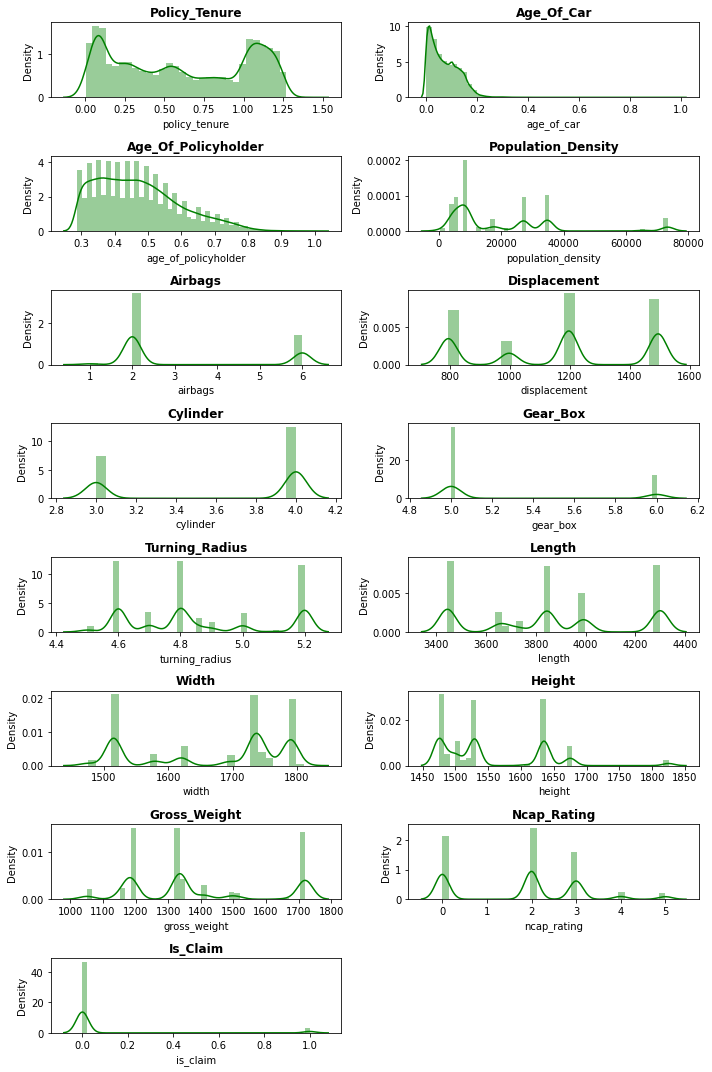

In [6]:
target = [i for i in numerical.columns]
plt.figure(figsize=(10,15))
for n,column in enumerate(target):
    plot=plt.subplot(8,2,n+1)
    sns.distplot(data[column],color='green')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

**Categorical Features**

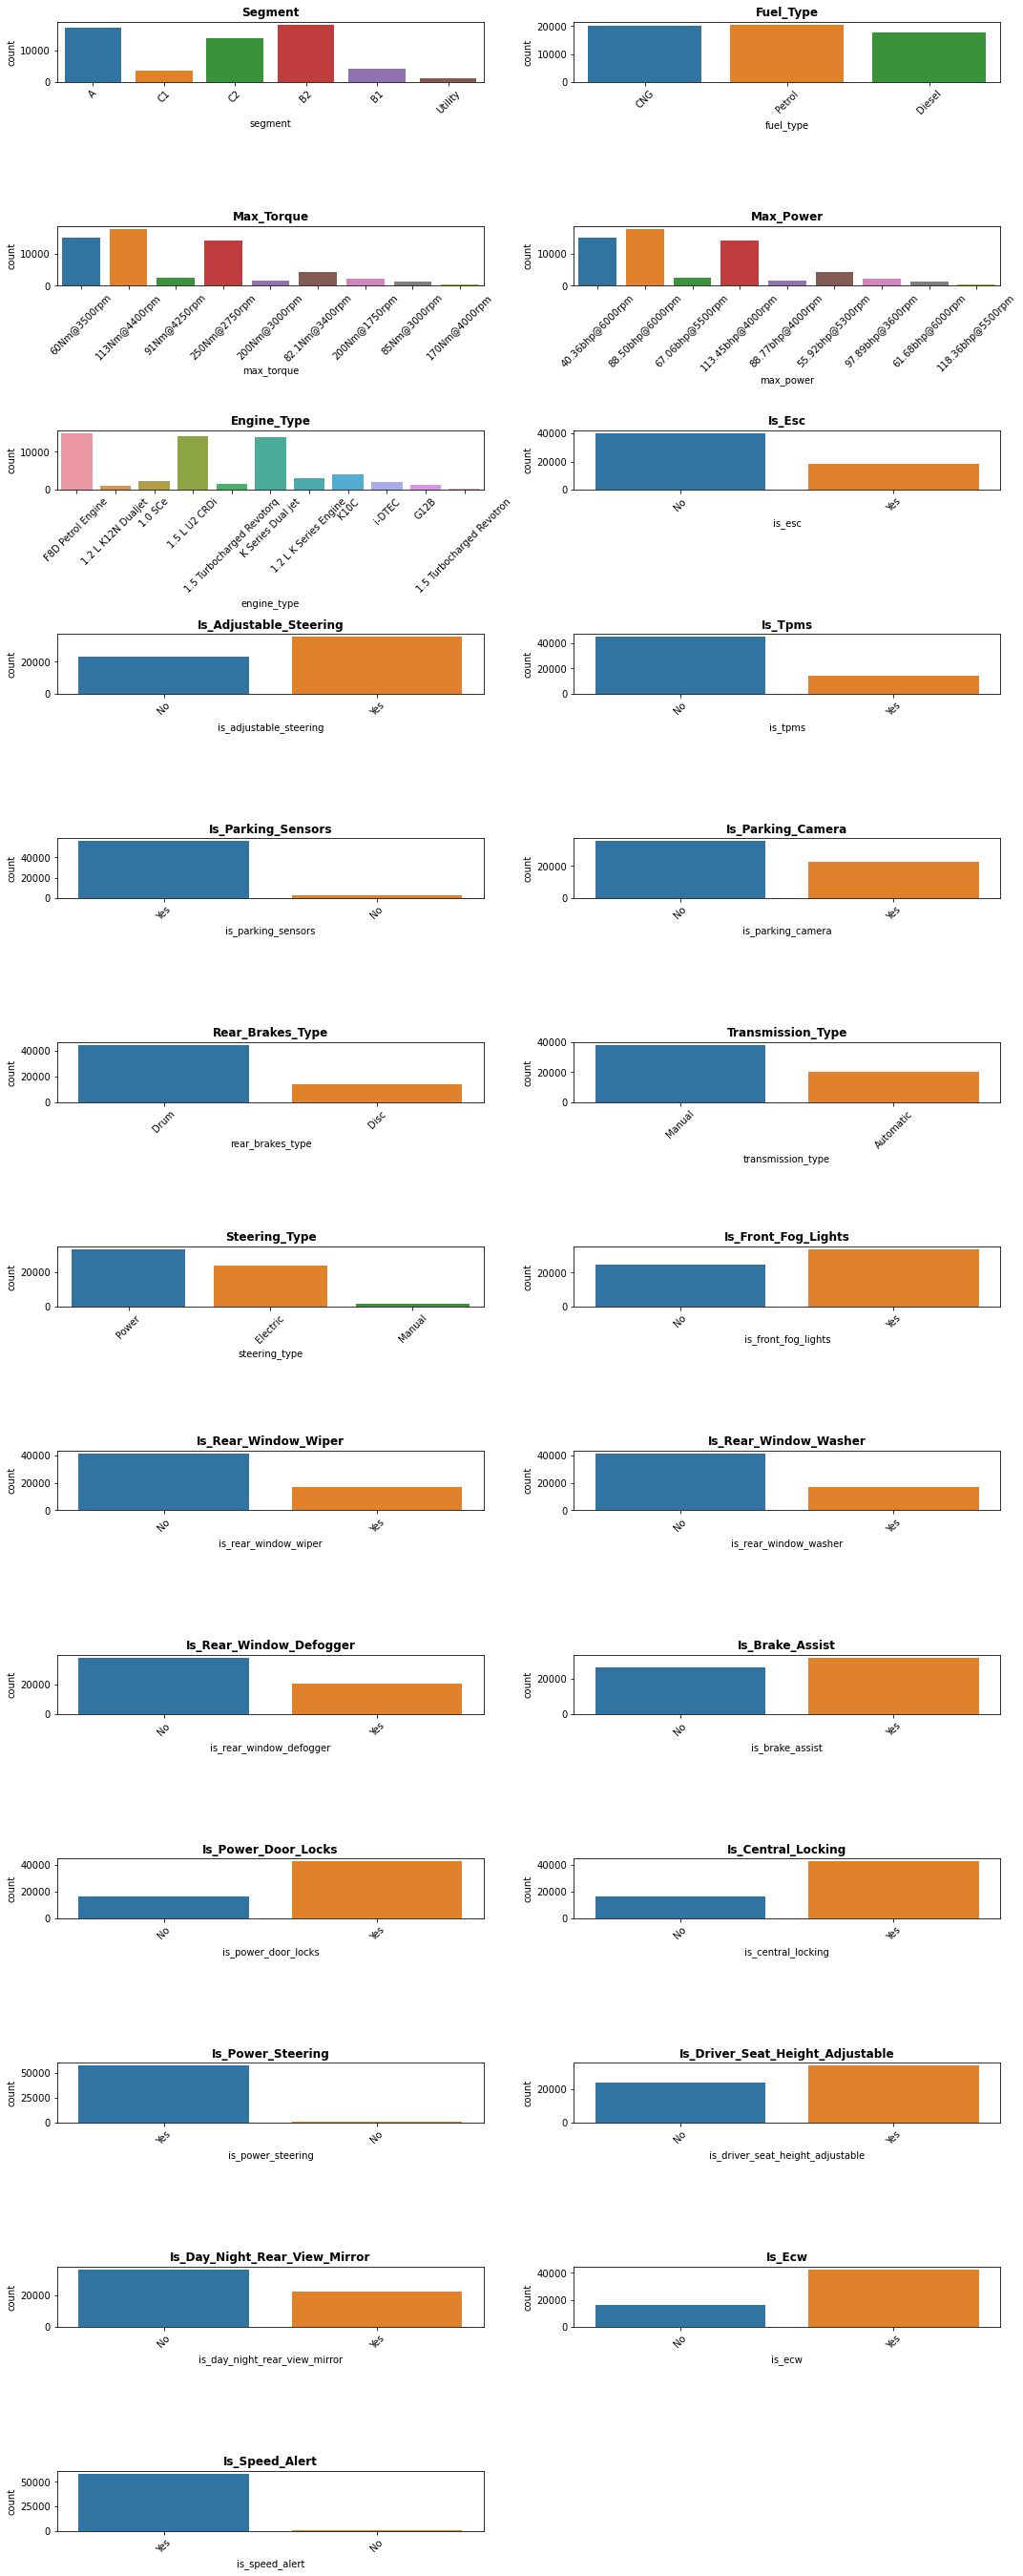

In [7]:
#categorical=categorical.drop('policy_id',axis=1)

target = [i for i in categorical.columns]
plt.figure(figsize = (15,40))
for n,column in enumerate(target):
    plot = plt.subplot(14,2,n+1)
    sns.countplot(data[column])
    plt.title(f'{column.title()}',weight='bold')
    plt.xticks(rotation=45)
    plt.tight_layout()

**Labels**

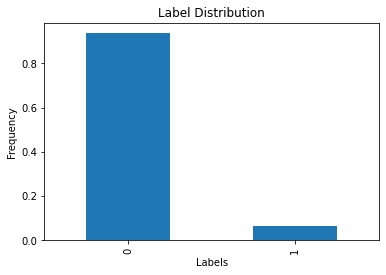

In [96]:
data["is_claim"].value_counts(normalize=True).plot(kind="bar")
plt.ylabel("Frequency")
plt.xlabel("Labels")
plt.title("Label Distribution");

From the plot abovem we can observe that there's a huge imbalance between the positive and negative labels. This means that even if we have a bad model that predicts the labels all negative, we will get a relative high accuracy whatever. Therefore, we need to resample the data labels, which will be done later in the Data Modeling part. 

# Data Modeling

**Data Encoding**

Since there are categorical feature, we need to encode them as label for later modeling.

In [8]:
# change the categorical variable to label encoder
from sklearn import preprocessing
for columns in data.columns:
    if dict(data.dtypes)[columns] == 'object':        
        label_encoder = preprocessing.LabelEncoder()
        data[columns] = label_encoder.fit_transform(data[columns])

In [9]:
data.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,segment,fuel_type,max_torque,max_power,engine_type,airbags,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,4990,0,0,5,2,6,2,...,0,0,0,1,0,0,0,1,0,0
1,0.672619,0.02,0.375000,27003,0,0,5,2,6,2,...,0,0,0,1,0,0,0,1,0,0
2,0.841110,0.02,0.384615,4076,0,0,5,2,6,2,...,0,0,0,1,0,0,0,1,0,0
3,0.900277,0.11,0.432692,21622,3,2,0,6,2,2,...,1,1,1,1,1,1,1,1,2,0
4,0.596403,0.11,0.634615,34738,0,2,8,5,0,2,...,0,1,1,1,0,1,1,1,2,0


**Train and Test Split**

In [101]:
from sklearn.model_selection import train_test_split
X = data.drop(columns = ['is_claim'])
y = data['is_claim']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

**Label Resampling**

In [102]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler(random_state=1)
print("Training set shape before resampling: " + str(X_train.shape), str(y_train.shape))
X_train, y_train = sampler.fit_resample(X_train,y_train)
print("Training set shape after resampling: " + str(X_train.shape), str(y_train.shape))

Training set shape before resampling: (46873, 39) (46873,)
Training set shape after resampling: (87762, 39) (87762,)


**BaseLine**

For the baseline model, we will create a simple model that only uses the "population density" feature to predict the is_claim label. Using our common sense that more people may tend to file car insurance in population dense area, we will sort the population density in descending order and select the top 50% to predict as positive. 

In [82]:
X_baseline = X_train[['population_density']]
y_baseline = y_train

In [103]:
baseline = X_baseline
baseline['label'] = y_train
baseline['pred'] = 0

In [104]:
# The baseline model of predicting car insurance claim
def baseline_model(baseline):
    claim_insurance = []
    baseline = baseline.sort_values(by=['population_density'],ascending = False)
    print(baseline)
    counter = 0
    for index,row in baseline.iterrows():
        if counter > len(baseline)*0.5: break
        counter += 1
        claim_insurance.append(index)
    return claim_insurance

In [105]:
for index,row in baseline.iterrows():
    if index in positive_pred:
        row['pred'] = 1

In [106]:
correct = 0
for index,row in baseline.iterrows():
    if row['label'] == row['pred']:
        correct += 1
baseline_acc = correct/len(baseline)
print("The accuracy score for this model is", baseline_acc)

The accuracy score for this model is 0.698644866193337


**Logitistic Regression**

We first train a simple Logistic Regression on out training set, and then print out the score, Confusion Matrix, and ROC curve.

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import eli5
from eli5.sklearn import PermutationImportance

In [122]:
# create a pipeline 
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# create search space of candidate learning algorithms and their hyperparameters
search_space = [{'classifier': [LogisticRegression(max_iter=1000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=1000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=1000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]


# create grid search 
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5), n_jobs = -1,
                   scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'], refit=False,
                   verbose=0)

# fit grid search
best_model = clf.fit(X_train, y_train)

In [123]:
# get the model with highest accuracy from grid search
p_accu = best_model.cv_results_['params'][np.argmin(best_model.cv_results_['rank_test_accuracy'])]
p_accu

{'classifier': LogisticRegression(max_iter=1000),
 'classifier__C': 1.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [124]:
# set the selected parameter to the pipeline
pipe.set_params(**p_accu)

Pipeline(steps=[('std', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=1000, penalty='l1',
                                    solver='saga'))])

In [125]:
# train on the entire training set with the model with highest accuracy from grid search
clf = pipe.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score1 = clf.score(X_test, y_test)
print("The accuracy score for this model is", score1)

The accuracy score for this model is 0.5657479307108115


              precision    recall  f1-score   support

           0       0.95      0.57      0.71     10963
           1       0.08      0.56      0.14       756

    accuracy                           0.57     11719
   macro avg       0.52      0.57      0.43     11719
weighted avg       0.89      0.57      0.67     11719



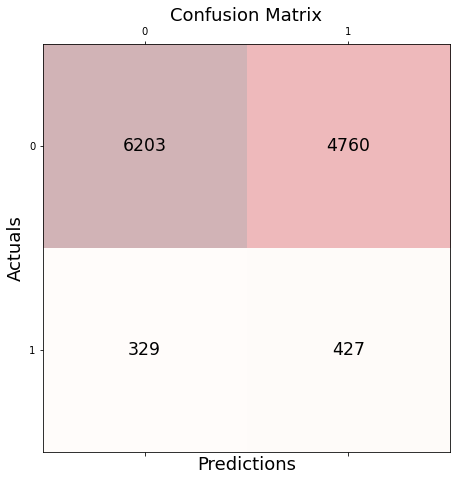

In [126]:
print(classification_report(y_test, y_pred))

cm1 = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm1, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax.text(x=j, y=i,s=cm1[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.6000420124063287


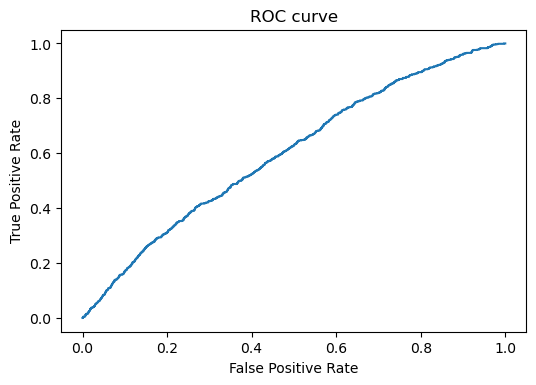

In [127]:
fpr = roc_curve(y_test, clf.predict_proba(X_test)[:,1])[0]  # false positive rate
tpr = roc_curve(y_test, clf.predict_proba(X_test)[:,1])[1]  # true positive rate
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

# plotting the ROC curve
plt.figure(dpi=100)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc)

In [128]:
# finding the Permutation importance

perm = PermutationImportance(clf).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0082 ± 0.0073,policy_tenure
0.0021 ± 0.0008,cylinder
0.0011 ± 0.0012,age_of_policyholder
0.0007 ± 0.0013,ncap_rating
0.0005 ± 0.0015,airbags
0.0000 ± 0.0003,is_speed_alert
0 ± 0.0000,is_adjustable_steering
0 ± 0.0000,is_tpms
0 ± 0.0000,max_power
0 ± 0.0000,rear_brakes_type


**KNN**

We then try the KNN model with neighbors ranging from 1 to 10; we check the accuracy for different neighboring values and find the one that produce the best accuracy. We then also check the confusion matrix for this model. 

In [143]:
from sklearn.neighbors import KNeighborsClassifier
for i in [1,2,3,4,5,6,7,8,9,10]:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    print('neighbors= '+str(i))
    print(neigh.score(X_test,y_test))

neighbors= 1
0.8792559092072703
neighbors= 2
0.8792559092072703
neighbors= 3
0.8248997354723099
neighbors= 4
0.8248997354723099
neighbors= 5
0.7819779844696646
neighbors= 6
0.7819779844696646
neighbors= 7
0.737008277156754
neighbors= 8
0.7370936086696818
neighbors= 9
0.6986090963392781
neighbors= 10
0.6987797593651336


In [145]:
neigh = KNeighborsClassifier(n_neighbors=i)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
predictions = [round(value) for value in y_pred]
score3 = accuracy_score(y_test, y_pred)
print("The accuracy score for test set is", score3)

The accuracy score for test set is 0.8792559092072703


              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10963
           1       0.07      0.08      0.08       756

    accuracy                           0.88     11719
   macro avg       0.51      0.51      0.51     11719
weighted avg       0.88      0.88      0.88     11719



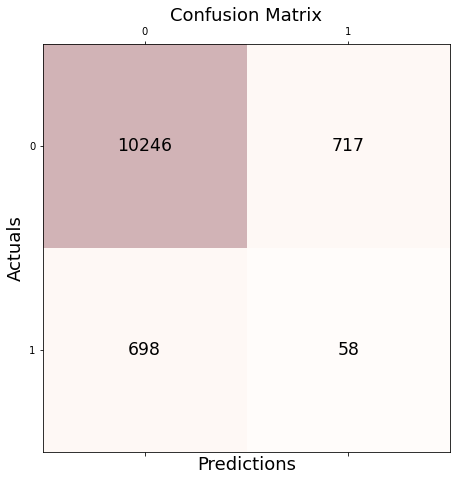

In [146]:
print(classification_report(y_test, y_pred))

cm3 = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm3, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm3.shape[0]):
    for j in range(cm3.shape[1]):
        ax.text(x=j, y=i,s=cm3[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Random Forest**

Finally, we try the random forest model. We used GridSearchCV to tune the parameters for the model. After finding the most optimized parameter values, we print out its accuracy and confusion matrix. We achieved an accuracy of approximately 0.92, which is the highest accuracy among all models that we've tried out. So this will be our final model. 

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [135]:
# The parameters to tune for random forest model

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Create the random grid
grid = {'n_estimators': n_estimators }

In [136]:
model = RandomForestClassifier()
model_opt = GridSearchCV(estimator = model, 
                         param_grid = grid, 
                         cv = 3, 
                         verbose=2)
model_opt.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....................................n_estimators=20; total time=   1.7s
[CV] END ....................................n_estimators=20; total time=   1.6s
[CV] END ....................................n_estimators=20; total time=   1.8s
[CV] END ....................................n_estimators=40; total time=   3.7s
[CV] END ....................................n_estimators=40; total time=   3.7s
[CV] END ....................................n_estimators=40; total time=   3.8s
[CV] END ....................................n_estimators=60; total time=   5.0s
[CV] END ....................................n_estimators=60; total time=   4.5s
[CV] END ....................................n_estimators=60; total time=   4.4s
[CV] END ....................................n_estimators=80; total time=   6.6s
[CV] END ....................................n_estimators=80; total time=   6.5s
[CV] END ....................................n_e

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160,
                                          180, 200]},
             verbose=2)

In [137]:
best_model = model_opt.best_params_
best_model

{'n_estimators': 140}

In [140]:
model = RandomForestClassifier(n_estimators = 140)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
score2 = accuracy_score(y_test, y_pred)
print("The accuracy score for test set is", score2)

The accuracy score for test set is 0.9199590408737947


              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10963
           1       0.08      0.02      0.03       756

    accuracy                           0.92     11719
   macro avg       0.51      0.50      0.50     11719
weighted avg       0.88      0.92      0.90     11719



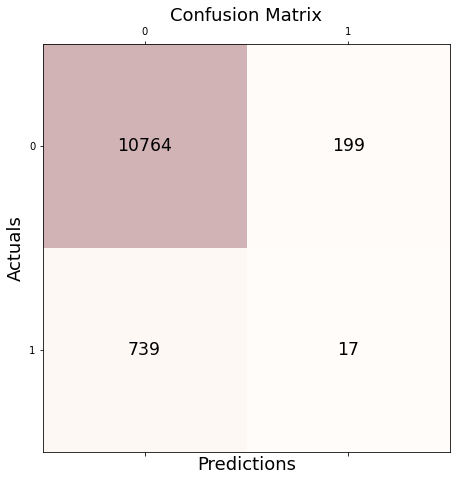

In [141]:
print(classification_report(y_test, y_pred))

cm2 = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm2, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm2.shape[0]):
    for j in range(cm2.shape[1]):
        ax.text(x=j, y=i,s=cm2[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

*Specify who in your group worked on which parts of the project.*